In [1]:
# For text processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from scipy.sparse import csr_matrix 
from sklearn.preprocessing import StandardScaler




import numpy as np

from scipy.stats import chi2_contingency
from scipy import stats
from scipy.sparse import hstack, csr_matrix
# For data manipulation
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import re
# For machine learning
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB



In [2]:
file_path = '../data/BuzzFeed_real_news_content.csv'
real_news = pd.read_csv(file_path)


In [3]:
real_news.head()



,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Real_1-Webpage,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com/36942/another-terrorist...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Leonora Cravotta",http://eaglerising.com,{'$date': 1474528230000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36942/another-terrorist...,"{""description"": ""\u201cWe believe at this poin..."
1,Real_10-Webpage,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws/2d4lNn9,http://a.abcnews.com/images/Politics/AP_donald...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/donald-trump-dr...,"{""fb_title"": ""Trump: Drugs a 'Very, Very Big F..."
2,Real_11-Webpage,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com/barack-obama/obama-un...,http://rightwingnews.com/wp-content/uploads/20...,Cassy Fiano,http://rightwingnews.com,{'$date': 1474476044000},https://www.youtube.com/embed/ji6pl5Vwrvk,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/barack-obama/obama-un...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam..."
3,Real_12-Webpage,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,http://politi.co/2de2qs0,http://static.politico.com/e9/11/6144cdc24e319...,"Jack Shafer,Erick Trickey,Zachary Karabell",http://politi.co,{'$date': 1474974420000},NaN,https://static.politico.com/dims4/default/8a1c...,http://www.politico.com/magazine/story/2016/09...,"{""description"": ""He sees it as zero-sum. She b..."
4,Real_13-Webpage,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,http://abcn.ws/2dh2NFs,http://a.abcnews.com/images/US/AP_Obama_BM_201...,"John Parkinson,More John,Abc News,More Alexander",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/president-obama...,"{""fb_title"": ""President Obama Vetoes 9/11 Vict..."


In [4]:
file_path2= '/home/izuchukwu/Downloads/buzzfeed/BuzzFeed_fake_news_content.csv'
fake_news= pd.read_csv(file_path2)

In [5]:
fake_news.head()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Fake_1-Webpage,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,http://www.addictinginfo.org/2016/09/19/proof-...,http://addictinginfo.addictinginfoent.netdna-c...,Wendy Gittleson,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://addictin...",http://addictinginfo.com/2016/09/19/proof-the-...,"{""publisher"": ""Addicting Info | The Knowledge ..."
1,Fake_10-Webpage,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,http://eaglerising.com/36899/charity-clinton-f...,http://eaglerising.com/wp-content/uploads/2016...,View All Posts,http://eaglerising.com,{'$date': 1474416521000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36899/charity-clinton-f...,"{""description"": ""The possibility that CHAI dis..."
2,Fake_11-Webpage,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,http://eaglerising.com/36880/a-hillary-clinton...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Tony Elliott",http://eaglerising.com,{'$date': 1474416638000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36880/a-hillary-clinton...,"{""description"": ""Hillary Clinton may be the fi..."
3,Fake_12-Webpage,Trump’s Latest Campaign Promise May Be His Mos...,"Donald Trump is, well, deplorable. He’s sugges...",http://www.addictinginfo.org/2016/09/19/trumps...,http://addictinginfo.addictinginfoent.netdna-c...,John Prager,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://2.gravat...",http://addictinginfo.com/2016/09/19/trumps-lat...,"{""publisher"": ""Addicting Info | The Knowledge ..."
4,Fake_13-Webpage,Website is Down For Maintenance,Website is Down For Maintenance,http://www.proudcons.com/clinton-foundation-ca...,NaN,NaN,http://www.proudcons.com,NaN,NaN,NaN,NaN,"{""og"": {""url"": ""http://www.proudcons.com"", ""ty..."


In [6]:
news_df = pd.concat([real_news, fake_news], ignore_index=True)


news_df['type'] = news_df['id'].str.split('_').str[0]




#merged both frames into one, added a new column to cateorize as real or fake

In [7]:
news_df.head()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data,type
0,Real_1-Webpage,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com/36942/another-terrorist...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Leonora Cravotta",http://eaglerising.com,{'$date': 1474528230000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36942/another-terrorist...,"{""description"": ""\u201cWe believe at this poin...",Real
1,Real_10-Webpage,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws/2d4lNn9,http://a.abcnews.com/images/Politics/AP_donald...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/donald-trump-dr...,"{""fb_title"": ""Trump: Drugs a 'Very, Very Big F...",Real
2,Real_11-Webpage,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com/barack-obama/obama-un...,http://rightwingnews.com/wp-content/uploads/20...,Cassy Fiano,http://rightwingnews.com,{'$date': 1474476044000},https://www.youtube.com/embed/ji6pl5Vwrvk,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/barack-obama/obama-un...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam...",Real
3,Real_12-Webpage,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,http://politi.co/2de2qs0,http://static.politico.com/e9/11/6144cdc24e319...,"Jack Shafer,Erick Trickey,Zachary Karabell",http://politi.co,{'$date': 1474974420000},NaN,https://static.politico.com/dims4/default/8a1c...,http://www.politico.com/magazine/story/2016/09...,"{""description"": ""He sees it as zero-sum. She b...",Real
4,Real_13-Webpage,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,http://abcn.ws/2dh2NFs,http://a.abcnews.com/images/US/AP_Obama_BM_201...,"John Parkinson,More John,Abc News,More Alexander",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/president-obama...,"{""fb_title"": ""President Obama Vetoes 9/11 Vict...",Real


In [8]:
news_df.shape

(182, 13)

In [9]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              182 non-null    object
 1   title           182 non-null    object
 2   text            182 non-null    object
 3   url             174 non-null    object
 4   top_img         172 non-null    object
 5   authors         141 non-null    object
 6   source          174 non-null    object
 7   publish_date    133 non-null    object
 8   movies          25 non-null     object
 9   images          172 non-null    object
 10  canonical_link  170 non-null    object
 11  meta_data       182 non-null    object
 12  type            182 non-null    object
dtypes: object(13)
memory usage: 18.6+ KB


In [10]:
news_df.describe()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data,type
count,182,182,182,174,172,141,174,133,25,172,170,182,182
unique,182,178,178,171,166,90,28,118,25,169,168,171,2
top,Real_1-Webpage,CNN’s Post-Debate Rigged Poll Busted…Here Are ...,We’re shocked — SHOCKED — to learn that CNN’s ...,http://eaglerising.com/36847/clinton-foundatio...,http://static.politico.com/da/f5/44342c424c68b...,Terresa Monroe-hamilton,http://politi.co,{'$date': 1474588800000},https://www.youtube.com/embed/ji6pl5Vwrvk,http://static.politico.com/da/f5/44342c424c68b...,http://eaglerising.com/36847/clinton-foundatio...,{},Real
freq,1,2,2,2,3,8,32,5,1,2,2,8,91


## 182 rows and 13 columns present
## Has no Na values

Cleandata

In [11]:
selected_columns = ["id", "title", "text", "source", "type", "images", "movies"]
news_df = news_df[selected_columns]
news_df.head()

# selected necessary columns to analyse

,id,title,text,source,type,images,movies
0,Real_1-Webpage,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com,Real,http://constitution.com/wp-content/uploads/201...,NaN
1,Real_10-Webpage,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws,Real,http://www.googleadservices.com/pagead/convers...,NaN
2,Real_11-Webpage,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com,Real,http://rightwingnews.com/wp-content/uploads/20...,https://www.youtube.com/embed/ji6pl5Vwrvk
3,Real_12-Webpage,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,http://politi.co,Real,https://static.politico.com/dims4/default/8a1c...,NaN
4,Real_13-Webpage,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,http://abcn.ws,Real,http://www.googleadservices.com/pagead/convers...,NaN


## I am going to change the "movies" and "images" column to categorical variables, "0" if not available and "1" if available

In [12]:
news_df['movies'] = news_df['movies'].notna().astype(int)
news_df['images'] = news_df['images'].notna().astype(int)

# I am ssuming that "addictinginfo.org" is one news source with different url
# so,I am combining all sources of "addictinginfo.org" into one 

In [13]:
fake_news['source'] = fake_news['source'].str.replace(r'www.addic|author.addic', 'addic', regex=True)
real_news['source'] = real_news['source'].str.replace(r'www.addic|author.addic', 'addic', regex=True)


In [14]:
news_df.head()

,id,title,text,source,type,images,movies
0,Real_1-Webpage,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com,Real,1,0
1,Real_10-Webpage,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws,Real,1,0
2,Real_11-Webpage,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com,Real,1,1
3,Real_12-Webpage,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,http://politi.co,Real,1,0
4,Real_13-Webpage,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,http://abcn.ws,Real,1,0


/tmp/ipykernel_12767/2821222016.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=source_counts, y='source', x='count', palette='Greens_d')


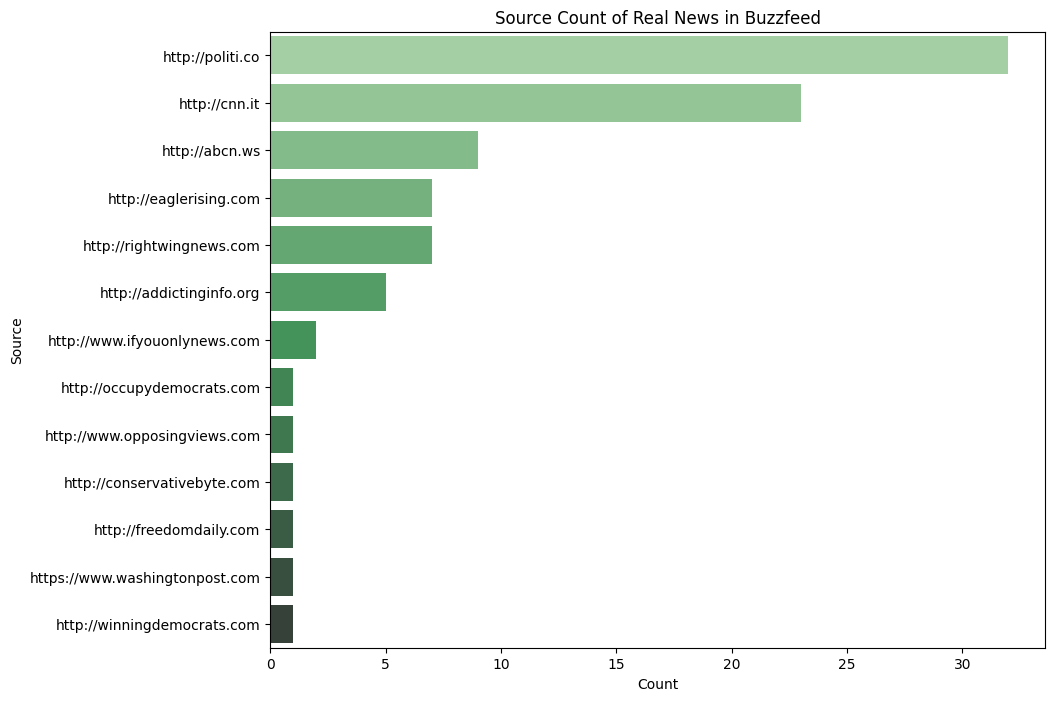

In [15]:
source_counts = real_news['source'].value_counts().reset_index()
source_counts.columns = ['source', 'count']

plt.figure(figsize=(10, 8))
sns.barplot(data=source_counts, y='source', x='count', palette='Greens_d')
plt.title('Sources of Real News')
plt.xlabel('Count')
plt.ylabel('Source')
plt.show()


/tmp/ipykernel_12767/2679658194.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=source_counts_fake, y='source', x='count', palette='Reds_d')


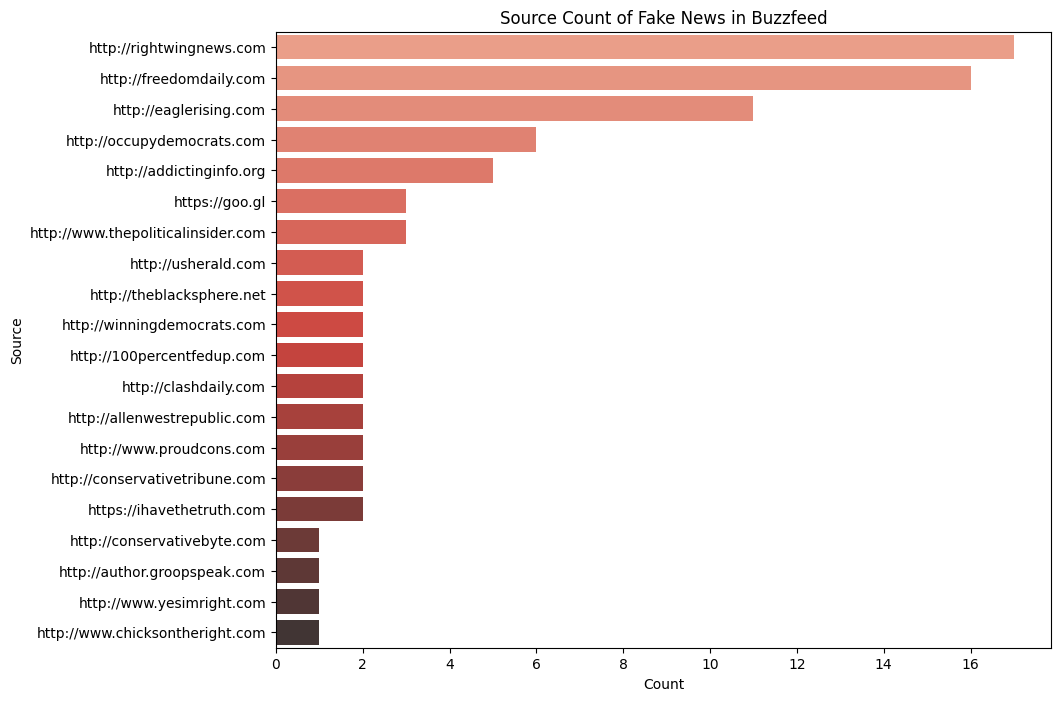

In [16]:
source_counts_fake = fake_news['source'].value_counts().reset_index()
source_counts_fake.columns = ['source', 'count']


plt.figure(figsize=(10, 8))
sns.barplot(data=source_counts_fake, y='source', x='count', palette='Reds_d')
plt.title('Source of Fake News')
plt.xlabel('Count')
plt.ylabel('Source')
plt.show()

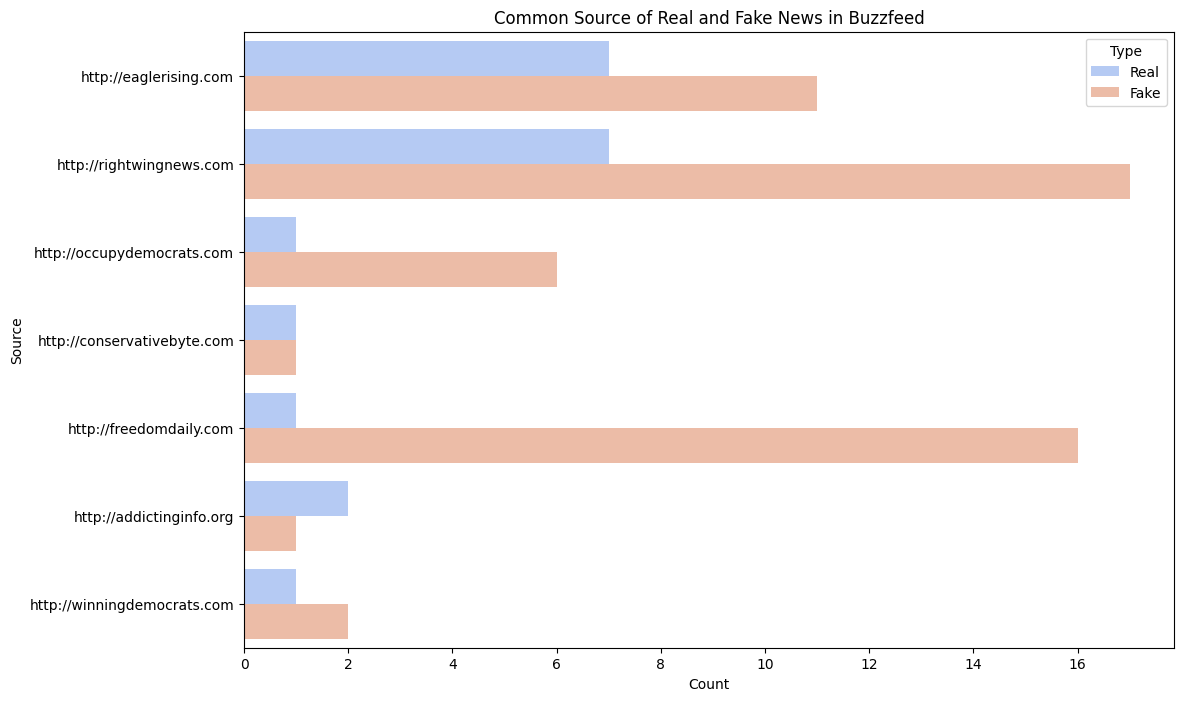

In [17]:
common_source = set(real_news['source']).intersection(set(fake_news['source']))

filtered_news_df = news_df[news_df['source'].isin(common_source)]

plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_news_df, y='source', hue='type', palette='coolwarm', dodge=True)
plt.title('Common Sources of Real and Fake news')
plt.xlabel('Count')
plt.ylabel('Source')
plt.legend(title='Type')
plt.show()

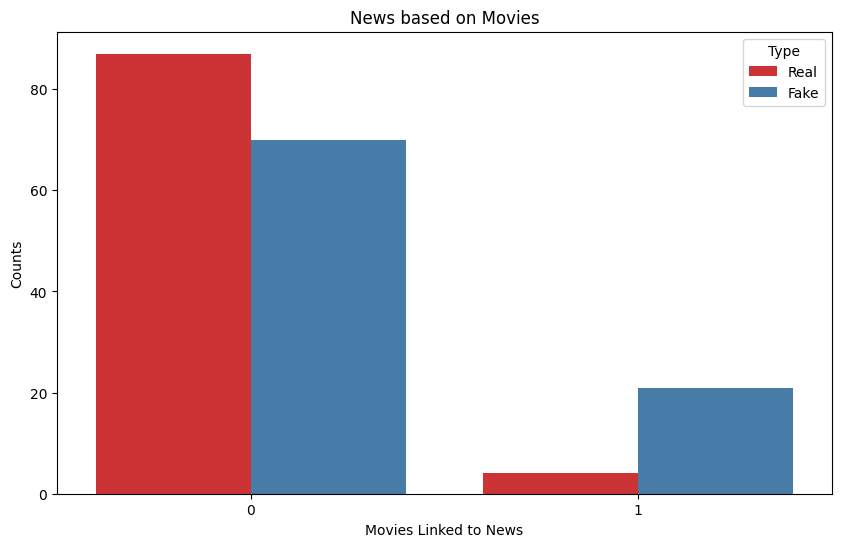

In [18]:
news_df['movies'] = news_df['movies'].astype('category')

plt.figure(figsize=(10, 6))
sns.countplot(data=news_df, x='movies', hue='type', palette='Set1', dodge=True)
plt.xlabel('Movies Linked to News')
plt.ylabel('Counts')
plt.title('News with Movie clips')
plt.legend(title='Type')
plt.show()

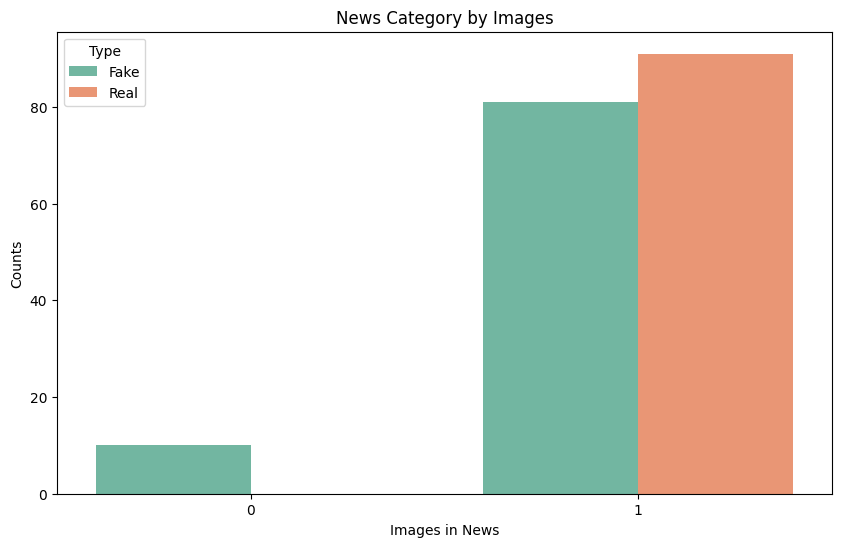

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=news_df, x='images', hue='type', palette='Set2', dodge=True)
plt.xlabel('Images in News')
plt.ylabel('Counts')
plt.title('Category of news by Images')
plt.legend(title='Type')
plt.show()

In [20]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/izuchukwu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/izuchukwu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
def clean_text(text):
    return re.sub(r"…|⋆|–|‹|”|“|‘|’", " ", text)


def preprocess_corpus(corpus):
    stemmer = SnowballStemmer('english')
    stop_words = set(stopwords.words('english'))
    additional_stopwords = {"eagle", "rising", "freedom", "daily"}

    processed_corpus = []

    for document in corpus:
        # Convert to lower case
        document = document.lower()
        # Remove numbers
        document = re.sub(r'\d+', '', document)
        # Remove punctuations
        document = re.sub(r'[^\w\s]', '', document)
        # Remove special characters
        document = clean_text(document)
        # Tokenize document
        tokens = word_tokenize(document)
        # Remove stopwords
        tokens = [word for word in tokens if word not in stop_words and word not in additional_stopwords]
        # Stem the words
        tokens = [stemmer.stem(word) for word in tokens]
        # Join tokens back to string
        processed_corpus.append(' '.join(tokens))

    return processed_corpus

In [22]:

def find_category_representative_words_using_chi_sq(dtm_matrix, categories, top_n=20):
    # Convert dtm_matrix to DataFrame
    dtm_df = pd.DataFrame(dtm_matrix)
    
    # Compute chi-squared values for each feature
    chi2vals = {}
    for col in dtm_df.columns:
        contingency_table = pd.crosstab(np.array(dtm_df[col]), np.array(categories))
        chi2_stat, _, _, _ = chi2_contingency(contingency_table)
        chi2vals[col] = chi2_stat
    
    # Select top N features based on chi-squared values
    top_features = sorted(chi2vals, key=chi2vals.get, reverse=True)[:top_n]
    
    # Add the categories as a column to the DataFrame
    dtm_df['NewsType'] = categories
    
    # Group by 'NewsType' and sum term frequencies for top terms
    cat_freq_df = dtm_df.groupby('NewsType').sum().reset_index()
    top_words_freq = cat_freq_df[top_features + ['NewsType']]
    
    return top_words_freq

In [23]:
def preprocess_title_corpus(titles):
    stop_words = set(stopwords.words('english'))
    stemmer = SnowballStemmer("english")
    processed_titles = []

    for title in titles:
        title = title.lower()  # Lowercase
        title = re.sub(r'\d+', '', title)  # Remove numbers
        title = re.sub(r'[^\w\s]', '', title)  # Remove punctuation
        tokens = word_tokenize(title)  # Tokenization
        tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
        tokens = [stemmer.stem(word) for word in tokens]  # Stem words
        processed_titles.append(' '.join(tokens))  # Join back into string

    return processed_titles


In [24]:
def create_dtm_matrix(titles):
    vectorizer = CountVectorizer()
    dtm_matrix = vectorizer.fit_transform(titles)
    return dtm_matrix.toarray(), vectorizer.get_feature_names_out()

In [25]:
def find_top_words(dtm_matrix, categories):
    return find_category_representative_words_using_chi_sq(dtm_matrix, categories, 20)

In [26]:
def plot_top_words(top_words_freq, feature_names, title):
    # Melting the data frame
    top_words_freq_melted = pd.melt(top_words_freq, id_vars='NewsType', 
                                    var_name='FeatureIndex', value_name='Frequency')

    # Map feature indices to feature names
    top_words_freq_melted['Word'] = top_words_freq_melted['FeatureIndex'].apply(lambda x: feature_names[int(x)])

    plt.figure(figsize=(12, 8))
    
    # create plot
    ax = sns.barplot(data=top_words_freq_melted, x='Word', y='Frequency', hue='NewsType', 
                     dodge=True, palette='Set1')
    
    # Add annotations to the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points')

    # Flip the axes
    plt.xticks(rotation=90)
    plt.title(title)
    plt.xlabel('Top 20 Words')
    plt.ylabel('Term Frequency of Words')
    plt.tight_layout()

    
    plt.show()

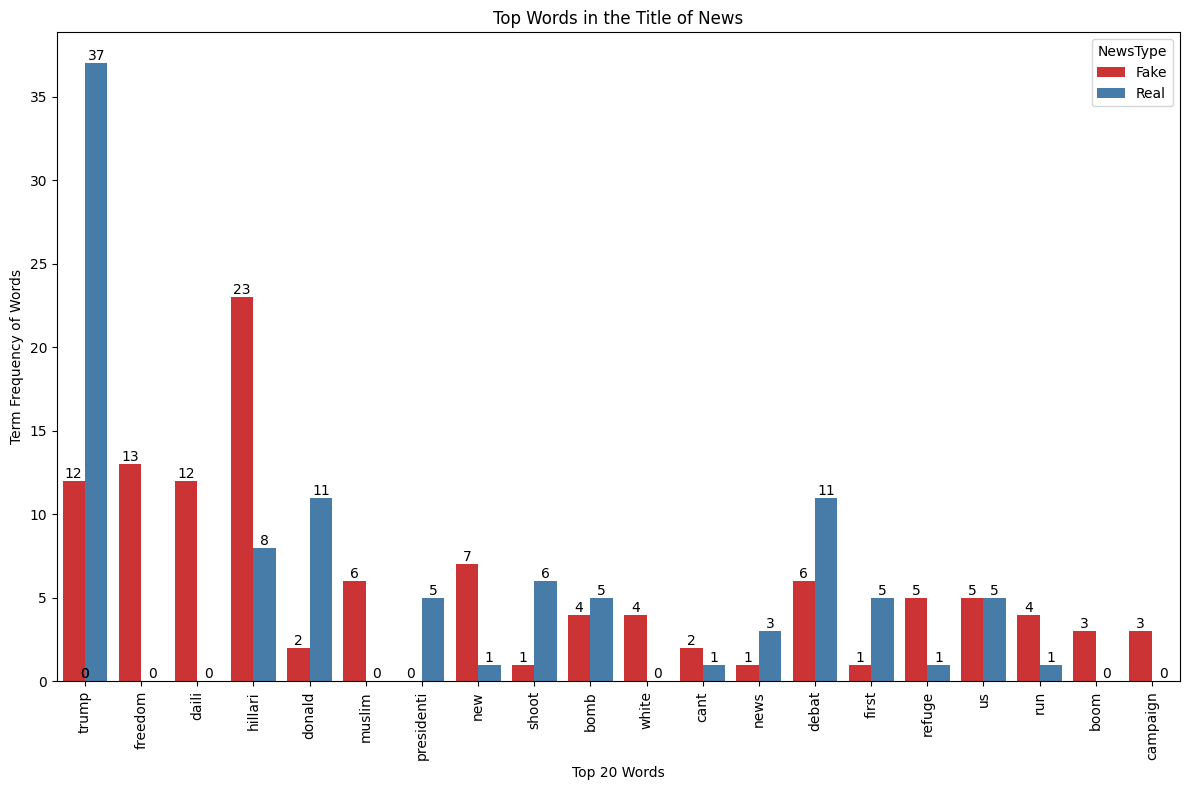

In [27]:

title_corpus = preprocess_title_corpus(news_df['title'])
title_dtm_matrix, feature_names = create_dtm_matrix(title_corpus)

# Finding top 20 words in the news title for both fake and real news
title_top_words_freq = find_top_words(title_dtm_matrix, news_df['type'])


plot_top_words(title_top_words_freq, feature_names, "Top Words in news titles")


## Now for Analysis of the body

In [28]:
def preprocess_body_corpus(corpus):
    stop_words = set(stopwords.words('english'))
    stemmer = SnowballStemmer("english")
    processed_corpus = []

    for doc in corpus:
        doc = doc.lower()  # Lowercase
        doc = re.sub(r'\d+', '', doc)  # Remove numbers
        doc = re.sub(r'[^\w\s]', '', doc)  # Remove punctuation
        tokens = word_tokenize(doc)  # Tokenization
        tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
        tokens = [stemmer.stem(word) for word in tokens]  # Stem words
        processed_corpus.append(' '.join(tokens))  # Join back into string

    return processed_corpus



In [29]:
# Convert body text to a document-term matrix
def create_body_dtm_matrix(texts):
    vectorizer = CountVectorizer()
    dtm_matrix = vectorizer.fit_transform(texts)
    return dtm_matrix.toarray(), vectorizer.get_feature_names_out()



In [30]:
# Function to find top words in the body text using Chi-Square
def find_body_top_words(dtm_matrix, categories, top_n=30):
    return find_category_representative_words_using_chi_sq(dtm_matrix, categories, top_n)



In [31]:

def plot_body_top_words(top_words_freq, feature_names, title):

    top_words_freq_melted = pd.melt(top_words_freq, id_vars='NewsType', 
                                    var_name='FeatureIndex', value_name='Frequency')

    # Map feature indices to original names
    top_words_freq_melted['Word'] = top_words_freq_melted['FeatureIndex'].apply(lambda x: feature_names[int(x)])

    plt.figure(figsize=(14, 10))
    
    # Create the bar plot
    ax = sns.barplot(data=top_words_freq_melted, x='Word', y='Frequency', hue='NewsType', 
                     dodge=True, palette='Set1')
    
    # Add annotations to the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points')

    # Flip the axes
    plt.xticks(rotation=90)
    plt.title(title)
    plt.xlabel('Top 30 Words')
    plt.ylabel('Term Frequency of Words')
    plt.tight_layout()

    # Display the plot
    plt.show()



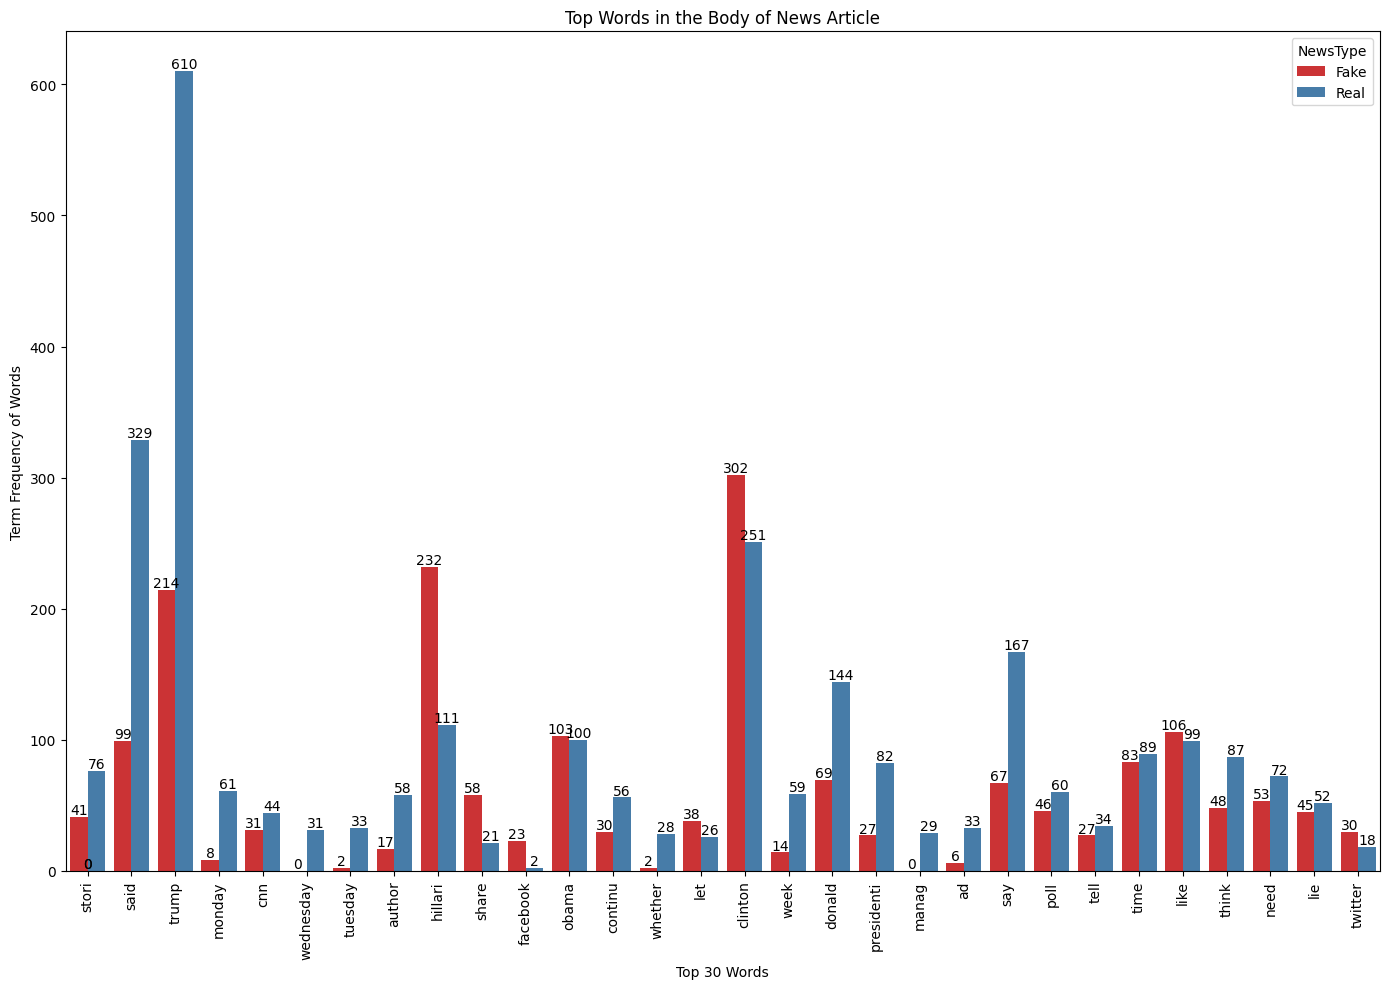

In [32]:

body_corpus = preprocess_body_corpus(news_df['text'])
body_dtm_matrix, feature_names = create_body_dtm_matrix(body_corpus)

# Finding top 30 words in the news body for both categories
body_top_words_freq = find_body_top_words(body_dtm_matrix, news_df['type'], top_n=30)

# Plotting the result
plot_body_top_words(body_top_words_freq, feature_names, "Top Words in the Body of News Articles")

In [33]:

title_length = title_dtm_matrix.sum(axis=1)

# Create a DataFrame with title length and categories
tl_df = pd.DataFrame({
    'title_length': title_length,
    'type': news_df['type']
})

# t-test (equal_var=False)
real_title_lengths = tl_df[tl_df['type'] == 'Real']['title_length']
fake_title_lengths = tl_df[tl_df['type'] == 'Fake']['title_length']

t_stat, p_value = stats.ttest_ind(real_title_lengths, fake_title_lengths, equal_var=False)


print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# mean of each group
mean_real = real_title_lengths.mean()
mean_fake = fake_title_lengths.mean()
print(f"Mean of Real: {mean_real}")
print(f"Mean of Fake: {mean_fake}")


T-statistic: -3.0998102408714914
P-value: 0.0022479189702194796
Mean of Real: 7.241758241758242
Mean of Fake: 8.32967032967033


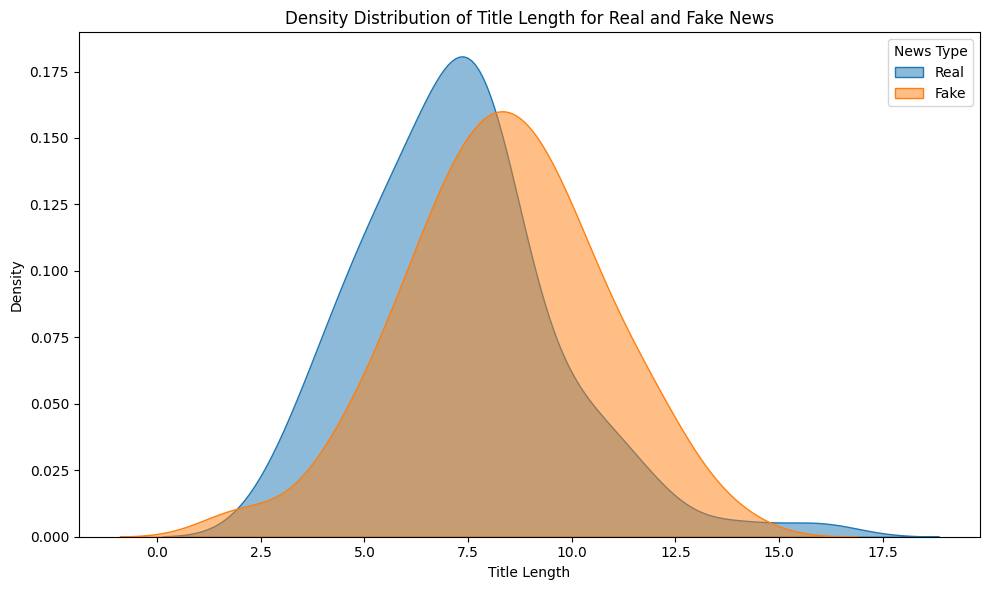

In [34]:

plt.figure(figsize=(10, 6))


handles = []
labels = []


for category in tl_df['type'].unique():
    subset = tl_df[tl_df['type'] == category]
    kde_plot = sns.kdeplot(data=subset, x='title_length', fill=True, alpha=0.5, label=category)
    
    handles, labels = kde_plot.get_legend_handles_labels()

# Add labels and title
plt.xlabel('Title Length')
plt.ylabel('Density')
plt.title('Density Distribution of Title Length for Real and Fake News')


plt.legend(handles, labels, title='News Type')


plt.tight_layout()
plt.show()


We observed a statistically significant difference (p-value = 0.00225) between the lengths of news titles for real and fake news. On average, the titles of fake news articles are slightly longer than those of real news articles. Specifically, the mean title length for fake news is 8.33, while for real news it is 7.24. This indicates that the distribution of title lengths for fake news is centered slightly higher compared to real news. The t-test results provide evidence that the title length of real news is significantly shorter than that of fake news.

analysis has focused on unigrams from the articles. processed the text by removing common words using stopwords and applied stemming.

Now, we aim to analyze the phrases used in the text body of the news articles. To achieve this, I will use a function to tokenize bigrams. Instead of using a basic text processing approach, we will use a method that preserves the original order and sequence of words by avoiding stemming and not removing common English words. This approach allows that we retain important phrases, which could be significant for analysis.

In [35]:
def bigram_tokenizer(text):
    tokens = word_tokenize(text.lower())  
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    bigrams = list(ngrams(filtered_tokens, 2))
    return [' '.join(bigram) for bigram in bigrams]



In [36]:
# Create the bigram matrix
vectorizer = CountVectorizer(tokenizer=bigram_tokenizer)
X = vectorizer.fit_transform(news_df['text'])

# Convert the matrix to a DataFrame
bigram_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Calculate the frequency of bigrams
bigram_freq = bigram_matrix.sum(axis=0).sort_values(ascending=False)

# Output the top bigrams and their frequencies
print(bigram_freq.head(20))

/home/izuchukwu/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


. “                308
, ”                274
, ’                218
hillary clinton    200
. ’                197
donald trump       187
trump ’            117
said .             112
. ``               110
, “                105
“ ’                 99
, ''                99
. ''                86
, trump             83
clinton ’           82
new york            81
” said              77
. trump             73
” “                 71
said ,              61
dtype: int64


In [37]:
def find_top_bigram(bigrams, top_n):
    stop_words = set(stopwords.words('english'))
    top_bigram_list = []
    
    for bigram in bigrams:
        unigrams = bigram.split(" ")
        if not (unigrams[0] in stop_words or unigrams[1] in stop_words):
            top_bigram_list.append(bigram)
        if len(top_bigram_list) == top_n:
            break
    
    return top_bigram_list



In [38]:
# Get the top bigrams
top_bigrams = find_top_bigram(bigram_freq.index, 20)

# Filter bigram matrix to include only the top bigrams
filtered_bigram_matrix = bigram_matrix[top_bigrams].copy()

# Add news type to the DataFrame using .loc
filtered_bigram_matrix.loc[:, 'NewsType'] = news_df['type'].values

# Summarize term frequency by news type
cat_freq_df = filtered_bigram_matrix.groupby('NewsType').sum()


print(cat_freq_df)

          . “  , ”  , ’  hillary clinton  . ’  donald trump  trump ’  said .  \
NewsType                                                                       
Fake       86   85  108              118  122            62       32      18   
Real      222  189  110               82   75           125       85      94   

          . ``  , “  “ ’  , ''  . ''  , trump  clinton ’  new york  ” said  \
NewsType                                                                     
Fake         2   41   29     2     7       19         53        26      21   
Real       108   64   70    97    79       64         29        55      56   

          . trump  ” “  said ,  
NewsType                        
Fake           18   31      14  
Real           55   40      47  


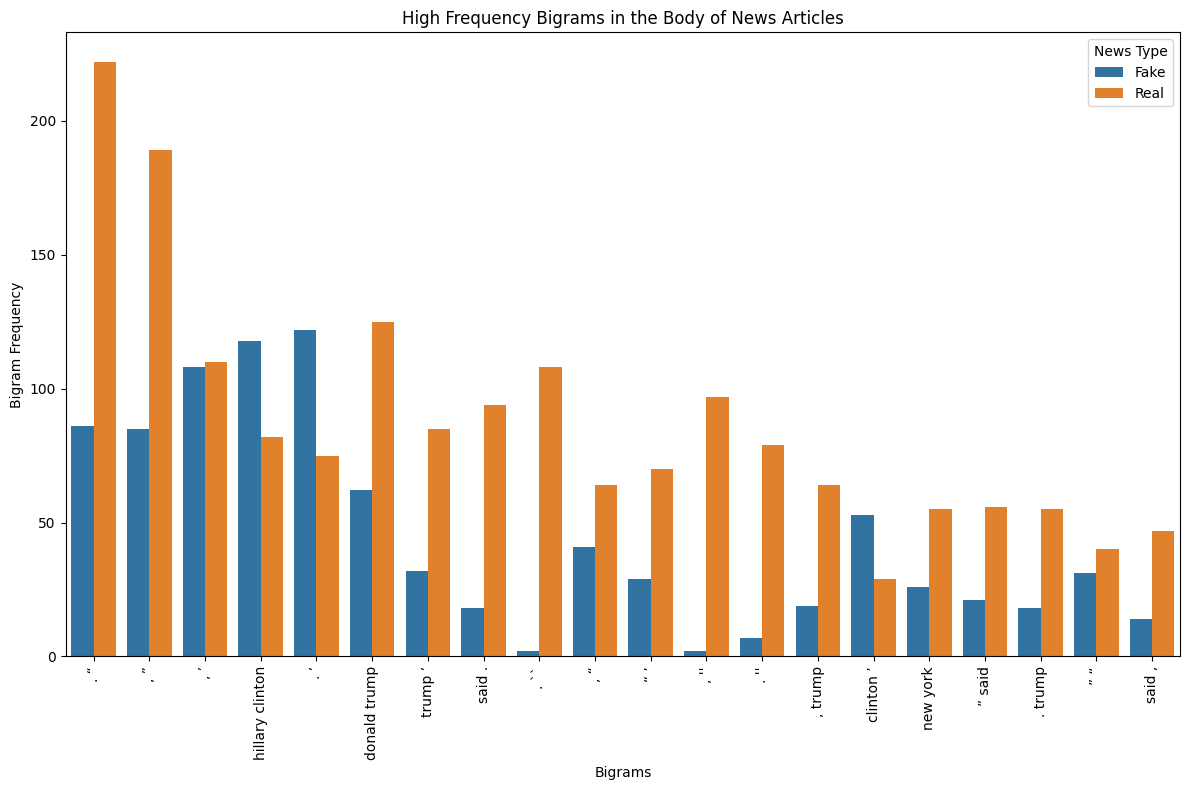

In [39]:
cat_freq_df_reset = cat_freq_df.reset_index()

# Melt the DataFrame
df_melted = cat_freq_df_reset.melt(id_vars='NewsType', var_name='bigram', value_name='bigram_frequency')


plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, x='bigram', y='bigram_frequency', hue='NewsType', dodge=True)


plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.xlabel('Bigrams')
plt.ylabel('Bigram Frequency')
plt.title('High Frequency Bigrams in the Body of News Articles')
plt.legend(title='News Type')


plt.tight_layout()
plt.show()

## Model Training


In [40]:

np.random.seed(123)

n_obs = len(news_df)
prop_split = 0.75


training_indices = np.random.choice(n_obs, size=int(n_obs * prop_split), replace=False)

# Create training and test sets
training_set = news_df.iloc[training_indices]
test_set = news_df.drop(training_set.index)



In [41]:

print(f"Training set size: {len(training_set)}")
print(f"Test set size: {len(test_set)}")

Training set size: 136
Test set size: 46


Detecting Fake news from the title 

In [42]:
vectorizer = CountVectorizer()

title_dtm = vectorizer.fit_transform(news_df['title'])

In [43]:
title_dtm_df = pd.DataFrame(title_dtm.toarray(), columns=vectorizer.get_feature_names_out())

subset_df = title_dtm_df.iloc[100:105, 100:105]



In [44]:
print(subset_df)

     billions  bind  birth  birther  black
100         0     0      0        0      0
101         0     0      0        0      0
102         0     0      0        0      0
103         0     0      0        0      0
104         0     0      0        0      0


This implies that we likely have many terms in both the title and body of the articles that are not useful as predictors for our model.This poses two main issues:

A larger amount of terms translates to more independent variables, which generally increases the time required to build our models.

The ratio of independent variables to observations impacts how well the model generalizes. With a limited number of observations, retaining too many terms can lead to overfitting.

To address these issues and make the Document-Term Matrix (DTM) denser, we use a method to remove sparse terms. this is done using a CountVectorizer with a max_df parameter. We set the sparsity threshold to retain only those terms that appear in a significant portion of the documents. For instance, if we set the sparsity limit to 0.997, we retain terms that appear in at least 0.3% of the documents. Conversely, setting the limit to 0.97 would retain only the top 24 terms that appear in at least 3% of the documents, discarding the rest.

This helps in reducing the amount of useless terms, making the model both more efficient and better at generalizing.

In [45]:
vectorizer = CountVectorizer(max_df=0.997)

# Fit and transform the titles to create the DTM
sparse_title_dtm = vectorizer.fit_transform(news_df['title'])

# Convert the DTM to a DataFrame
sparse_title_dtm_df = pd.DataFrame(sparse_title_dtm.toarray(), columns=vectorizer.get_feature_names_out())

# Calculate the number of documents and terms
num_docs, num_terms = sparse_title_dtm.shape

# Calculate non-zero entries
num_non_zero_entries = sparse_title_dtm.nnz

# Calculate sparsity
sparsity = 1 - (num_non_zero_entries / (num_docs * num_terms))

print(f"Document-Term Matrix (documents: {num_docs}, terms: {num_terms})")
print(f"Non-/sparse entries: {num_non_zero_entries}/{num_docs * num_terms}")
print(f"Sparsity           : {sparsity:.2%}")
print(f"Maximal term length: {max(len(term) for term in vectorizer.get_feature_names_out())}")
print(f"Weighting          : term frequency (tf)")

Document-Term Matrix (documents: 182, terms: 938)
Non-/sparse entries: 1983/170716
Sparsity           : 98.84%
Maximal term length: 16
Weighting          : term frequency (tf)


In [46]:
y_true = news_df['type']
x_train, x_test, y_train, y_test = train_test_split(
    title_dtm_df, y_true, test_size=0.25, random_state=123, stratify=y_true)



In [47]:

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (136, 938)
Test data shape: (46, 938)
Training labels shape: (136,)
Test labels shape: (46,)


In this part of the analysis, we build three different classifiers to classify news articles as either Real or Fake based on text features.

Title-Based Classifier:

Outcome Variable: News category (Real or Fake)
Features: Terms used in the title of the news articles

Body-Based Classifier:

Outcome Variable: News category (Real or Fake)
Features: Terms used in the body of the news articles

Combined Classifier:

Outcome Variable: News category (Real or Fake)
Features: Combined terms from both the title and body of the news articles


## Using Naive Bayes Model

In [48]:
nb_title = MultinomialNB()
nb_title.fit(x_train, y_train)

MultinomialNB()

In [49]:
predicted_nb_title = nb_title.predict(x_test)

In [50]:
accuracy_nb_title = accuracy_score(y_test, predicted_nb_title)

In [51]:
print(f"Accuracy of Naive Bayes on the title dataset: {accuracy_nb_title:.4f}")

Accuracy of Naive Bayes on the title dataset: 0.6957


The accuracy of Naive Bayes classifier on title dtm is only 69.5%

## Using Logistic Regression

In [52]:
log_fit_title = LogisticRegression(penalty='l2', solver='liblinear', random_state=123)

log_fit_title.fit(x_train, y_train)



LogisticRegression(random_state=123, solver='liblinear')

In [53]:

predicted_log_title = log_fit_title.predict(x_test)

accuracy_log_title = accuracy_score(y_test, predicted_log_title)



In [54]:
print(f"Accuracy of Logistic Regression on the title dataset: {accuracy_log_title:.4f}")

Accuracy of Logistic Regression on the title dataset: 0.6739


The accuracy of logistic regression model is 67.39%

## Using Random Forest Classifier

In [55]:
rf_title = RandomForestClassifier(n_estimators=50, random_state=123, oob_score=True)
rf_title.fit(x_train, y_train)  



RandomForestClassifier(n_estimators=50, oob_score=True, random_state=123)

In [56]:

print(rf_title)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=123)


In [57]:

print("Feature importances:")
print(rf_title.feature_importances_)


print(f"Number of trees in the forest: {len(rf_title.estimators_)}")


Feature importances:
[4.57236445e-04 0.00000000e+00 4.81394263e-04 5.75593455e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.91236436e-03
 0.00000000e+00 3.01349832e-03 4.82556740e-04 3.26362391e-04
 4.94662610e-03 0.00000000e+00 2.50210325e-03 2.34565832e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.68506745e-03 4.18035902e-04 1.43080764e-03 1.20125381e-03
 5.51817491e-04 1.05375600e-03 1.49903652e-03 0.00000000e+00
 1.17626966e-03 5.20169320e-04 1.01641456e-03 3.33841610e-04
 9.54492825e-04 3.95965181e-04 1.63452417e-03 0.00000000e+00
 4.78468900e-04 5.43661214e-04 2.95138889e-04 0.00000000e+00
 2.14641729e-03 0.00000000e+00 3.32775195e-03 7.13942856e-03
 8.51914947e-04 2.45949074e-05 6.44443743e-04 0.00000000e+00
 0.00000000e+00 9.17091770e-04 6.07078866e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.45566933e-04 0.00000000e+00
 0.00000000e+00 1.28225884e-02 4.62439715e-04 9.48115998e-04
 0.00000000e+00 2.96583229e-03 0.00000000e+00 0.00000000e+00
 5.

In [58]:
y_pred = rf_title.predict(x_test)



In [59]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=['Fake', 'Real'])
print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[14  9]
 [ 2 21]]


In [60]:
# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['Fake', 'Real'])
print("Classification Report:")
print(class_report)

# Out-of-Bag Error
if hasattr(rf_title, 'oob_score_'):
    print(f"Out-of-Bag Error Estimate: {1 - rf_title.oob_score_:.2%}")
else:
    print("OOB score is not available. Make sure oob_score=True was set during initialization.")


Classification Report:
              precision    recall  f1-score   support

        Fake       0.88      0.61      0.72        23
        Real       0.70      0.91      0.79        23

    accuracy                           0.76        46
   macro avg       0.79      0.76      0.76        46
weighted avg       0.79      0.76      0.76        46

Out-of-Bag Error Estimate: 32.35%


In [61]:
accuracy_rf_title = accuracy_score(y_test, y_pred)

print(f"Accuracy of Random Forest on the title dataset: {accuracy_rf_title:.4f}")

Accuracy of Random Forest on the title dataset: 0.7609


76% accuracy

# fake news detection from the body

In [62]:
# remove some terms that don't appear very often and making body_dtm denser
# max_df=0.97 means we keep terms that appear in at most 97% of the documents
vectorizer = CountVectorizer(max_df=0.97)

# Fit and transform the original corpus to create a new DTM
sparse_body_dtm = vectorizer.fit_transform(body_corpus)

# Convert sparse DTM to a DataFrame
sparse_body_dtm_df = pd.DataFrame(sparse_body_dtm.toarray(), columns=vectorizer.get_feature_names_out())

# Check the shape of the new sparse DTM
print(sparse_body_dtm_df.shape)

(182, 7133)


In [63]:
body_dtm = sparse_body_dtm.toarray()

y_true = news_df['type'].values  # Convert the type column to a numpy array

# Split the dataset into training and test sets using the training indices

x_train_body = body_dtm[training_indices, :]  # Rows for training
x_test_body = body_dtm[np.setdiff1d(np.arange(body_dtm.shape[0]), training_indices), :]  # Rows for testing


# Print shapes to verify
print(f"x_train_body shape: {x_train_body.shape}")
print(f"x_test_body shape: {x_test_body.shape}")
print(f"y_true shape: {y_true.shape}")

x_train_body shape: (136, 7133)
x_test_body shape: (46, 7133)
y_true shape: (182,)


# Using naive bayes

In [64]:
nb_body = GaussianNB()  # Use GaussianNB for continuous features
nb_body.fit(x_train_body, y_true[training_indices])  # Train the model

# Make predictions on the test set
predicted_naive_body = nb_body.predict(x_test_body)

# Calculate accuracy
accuracy_naive_body = accuracy_score(y_true[np.setdiff1d(np.arange(body_dtm.shape[0]), training_indices)], predicted_naive_body)

print(f"Accuracy of Naive Bayes model on the body: {accuracy_naive_body:.4f}")

Accuracy of Naive Bayes model on the body: 0.5000


# Using logistice regression

In [65]:
log_reg_body = LogisticRegression(solver='liblinear')  # Used 'liblinear' beacuse of small dataset
log_reg_body.fit(x_train_body, y_true[training_indices])  

# Make predictions on the test set
predicted_glm_body = log_reg_body.predict(x_test_body)

# Calculate accuracy
accuracy_log_body = accuracy_score(y_true[np.setdiff1d(np.arange(body_dtm.shape[0]), training_indices)], predicted_glm_body)

print(f"Accuracy of Logistic Regression model: {accuracy_log_body:.4f}")

Accuracy of Logistic Regression model: 0.7826


# Using random forest

In [66]:

body_dtm = sparse_body_dtm.toarray() 

x_train_body = body_dtm[training_indices]  
y_train_body = y_true[training_indices]      


x_test_body = body_dtm[~training_indices]  
y_test_body = y_true[~training_indices]      


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf_body = RandomForestClassifier(n_estimators=500, random_state=123)
rf_body.fit(x_train_body, y_train_body)

# Make predictions
predicted_rf_body = rf_body.predict(x_test_body)

# Calculate accuracy
accuracy_rf_body = np.sum(y_test_body == predicted_rf_body) / len(predicted_rf_body)

# Print accuracy
print(f"Accuracy of random forest on text body: {accuracy_rf_body:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_body, predicted_rf_body)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy of random forest on text body: 0.9559
Confusion Matrix:
[[66  5]
 [ 1 64]]


# Using either title or body

In [68]:

title_body_dtm = body_dtm.copy()

# Get common features (column indices)
common_features = list(set(range(body_dtm.shape[1])) & set(range(title_dtm.shape[1])))

# Sum the common features
if isinstance(title_body_dtm, csr_matrix):  # If title_body_dtm is a sparse matrix
    title_body_dtm[:, common_features] += title_dtm[:, common_features].toarray()
else:  
    title_body_dtm[:, common_features] += title_dtm[:, common_features]

# Get title only features
title_only_features = list(set(range(title_dtm.shape[1])) - set(range(body_dtm.shape[1])))

# Combine title_only_features from title_dtm to title_body_dtm
if title_only_features:
    # Convert title_dtm to dense
    title_only_data = title_dtm[:, title_only_features].toarray() if hasattr(title_dtm, 'toarray') else title_dtm[:, title_only_features]

    # Ensure that title_only_data is 2D
    if title_only_data.ndim == 1:
        title_only_data = title_only_data[:, np.newaxis]  # Reshape to 2D if necessary

    # stack the arrays
    title_body_dtm = hstack([title_body_dtm, title_only_data])

# Check if title_body_dtm is sparse or dense
if hasattr(title_body_dtm, 'toarray'):
    title_body_dtm_df = pd.DataFrame(title_body_dtm.toarray())
else:
    title_body_dtm_df = pd.DataFrame(title_body_dtm)


print(f"Combined title and body DTM shape: {title_body_dtm.shape}")


Combined title and body DTM shape: (182, 7133)


# Using naive bayes

In [ ]:
nb_body_tb = MultinomialNB()
nb_body_tb.fit(title_body_dtm[training_indices], y_true[training_indices])

# Predict using the model on the test set
predicted_nb_tb = nb_body_tb.predict(title_body_dtm[np.setdiff1d(np.arange(title_body_dtm.shape[0]), training_indices)])

# Calculate accuracy
accuracy_nb_tb = accuracy_score(y_true[np.setdiff1d(np.arange(y_true.shape[0]), training_indices)], predicted_nb_tb)

print(f'Accuracy of Naive bayes on title or body terms: {accuracy_nb_tb}')

# Using Logistic regression

In [70]:
scaler = StandardScaler(with_mean=False)  # Set with_mean=False for sparse matrices
title_body_dtm_scaled = scaler.fit_transform(title_body_dtm)


log_reg_fit_title_body = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
log_reg_fit_title_body.fit(title_body_dtm_scaled[training_indices], y_true[training_indices])

# Predict using the model on the test set
predicted_log_tb = log_reg_fit_title_body.predict(title_body_dtm_scaled[np.setdiff1d(np.arange(title_body_dtm.shape[0]), training_indices)])

# Calculate accuracy
accuracy_log_tb = accuracy_score(y_true[np.setdiff1d(np.arange(y_true.shape[0]), training_indices)], predicted_log_tb)

print(f'Accuracy of logistic regression on terms in either the title or body: {accuracy_log_tb}')

Accuracy of logistic regression on terms in either the title or body: 0.6956521739130435


In [ ]:
np.random.seed(123)


rf_tb = RandomForestClassifier(n_estimators=500, random_state=123)  # n_estimators can be adjusted
rf_tb.fit(title_body_dtm_scaled[training_indices], y_true[training_indices])

predicted_rf_tb = rf_tb.predict(title_body_dtm_scaled[np.setdiff1d(np.arange(title_body_dtm.shape[0]), training_indices)])

accuracy_rf_tb = accuracy_score(y_true[np.setdiff1d(np.arange(y_true.shape[0]), training_indices)], predicted_rf_tb)

print(f'Accuracy of random forest on title or body terms: {accuracy_rf_tb}')